In [1]:
# Instalar PySpark
!pip install pyspark

# Importar las bibliotecas necesarias
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, approx_count_distinct, corr
from pyspark.sql import functions as F

In [4]:
# Paso 2: Cargar el archivo CSV en un DataFrame de Spark
# Asegúrate de subir el archivo 'muestra_datos_en_espanol.csv' a Colab y cambiar la ruta si es necesario
df = spark.read.csv('/content/muestra_datos.csv', header=True, inferSchema=True)
df.show(5)

+---+---------+------------+-----+--------+-------------------+
| ID|Categoria|Subcategoria|Valor|Cantidad|         Fecha_Hora|
+---+---------+------------+-----+--------+-------------------+
|  1|        C|           Y|   28|      16|2023-01-01 00:00:00|
|  2|        D|           Z|   69|      18|2023-01-01 01:00:00|
|  3|        A|           X|   77|       8|2023-01-01 02:00:00|
|  4|        C|           X|   81|       3|2023-01-01 03:00:00|
|  5|        C|           X|   40|       9|2023-01-01 04:00:00|
+---+---------+------------+-----+--------+-------------------+
only showing top 5 rows



In [5]:
# Paso 3: Optimizar Operaciones de Agregación
# Calcular el promedio y máximo del "Valor" por "Categoria"
agg_df = df.groupBy("Categoria").agg(
    {"Valor": "avg", "Valor": "max"}
).withColumnRenamed("avg(Valor)", "Valor_Promedio").withColumnRenamed("max(Valor)", "Valor_Maximo")

agg_df.show()

+---------+------------+
|Categoria|Valor_Maximo|
+---------+------------+
|        B|          99|
|        D|          99|
|        C|          99|
|        A|          99|
+---------+------------+



In [6]:
# Paso 4: Filtrar los Datos de Forma Eficiente
# Filtrar registros con "Valor" superior a 50 para un análisis de altos valores
filtered_df = df.filter(df["Valor"] > 50)
filtered_df.show(5)

+---+---------+------------+-----+--------+-------------------+
| ID|Categoria|Subcategoria|Valor|Cantidad|         Fecha_Hora|
+---+---------+------------+-----+--------+-------------------+
|  2|        D|           Z|   69|      18|2023-01-01 01:00:00|
|  3|        A|           X|   77|       8|2023-01-01 02:00:00|
|  4|        C|           X|   81|       3|2023-01-01 03:00:00|
|  7|        A|           X|   96|      10|2023-01-01 06:00:00|
|  8|        A|           X|   62|      10|2023-01-01 07:00:00|
+---+---------+------------+-----+--------+-------------------+
only showing top 5 rows



In [7]:
# Paso 5: Generar Nuevas Columnas para Indicadores
# Crear una columna que clasifique los valores en "Alto" o "Bajo"
from pyspark.sql.functions import when

df = df.withColumn("Nivel_Valor", when(df["Valor"] > 50, "Alto").otherwise("Bajo"))
df.show(5)

+---+---------+------------+-----+--------+-------------------+-----------+
| ID|Categoria|Subcategoria|Valor|Cantidad|         Fecha_Hora|Nivel_Valor|
+---+---------+------------+-----+--------+-------------------+-----------+
|  1|        C|           Y|   28|      16|2023-01-01 00:00:00|       Bajo|
|  2|        D|           Z|   69|      18|2023-01-01 01:00:00|       Alto|
|  3|        A|           X|   77|       8|2023-01-01 02:00:00|       Alto|
|  4|        C|           X|   81|       3|2023-01-01 03:00:00|       Alto|
|  5|        C|           X|   40|       9|2023-01-01 04:00:00|       Bajo|
+---+---------+------------+-----+--------+-------------------+-----------+
only showing top 5 rows



In [8]:
# Paso 6: Gráficos Estadísticos en PySpark y Matplotlib
# Convertir DataFrame de Spark a Pandas para gráficos
pandas_df = df.toPandas()


In [9]:
# Importar la biblioteca de gráficos
import matplotlib.pyplot as plt


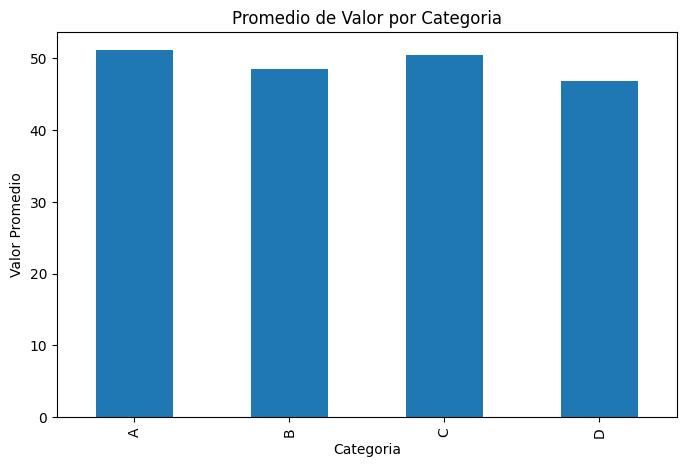

In [10]:
# Gráfico de barras del promedio de "Valor" por "Categoria"
plt.figure(figsize=(8, 5))
pandas_df.groupby("Categoria")["Valor"].mean().plot(kind="bar")
plt.title("Promedio de Valor por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Valor Promedio")
plt.show()

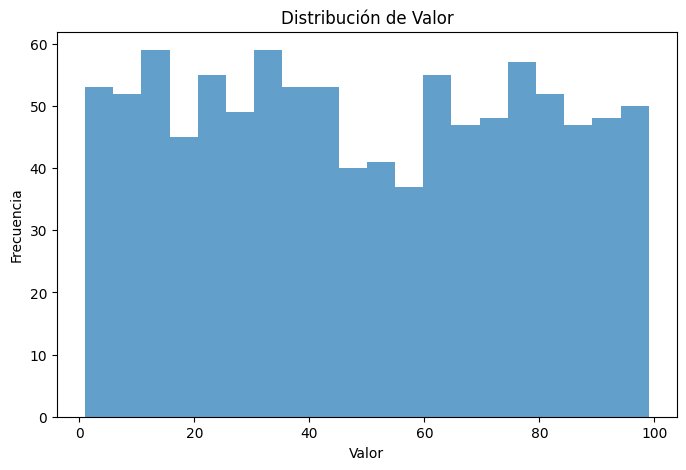

In [11]:
# Gráfico de la distribución de "Valor"
plt.figure(figsize=(8, 5))
pandas_df["Valor"].plot(kind="hist", bins=20, alpha=0.7)
plt.title("Distribución de Valor")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()